# LAX DATASET

In [33]:
#Dependencies

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

import matplotlib.style as style
style.available
style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [34]:
data_lax=pd.read_csv('airline_details_LAX.csv')
data_lax = data_lax.dropna(how='any')
data_lax = data_lax.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                   ' carrier_delay':'carrier_delay'})
data_lax.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [35]:
data_lax = data_lax[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]



In [36]:
data_lax = data_lax[data_lax['year'] != 2019] # data from 2010 to 2018 
data_lax.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,150.06,2.83,125.88,49,7
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,16.27,0.00,3.13,0,0
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,3.02,0.00,7.32,0,0
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,45.53,9.38,19.83,1,0
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,63.79,0.00,39.48,4,4


In [37]:
data_lax.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.773165,6.445515,1439.255004,289.753150,74.549555,7.797435,106.092342,0.648940,100.664759,15.802817,1.963677
std,2.576513,3.454585,1333.304765,307.499452,75.996883,11.097968,122.149275,1.224958,135.582328,24.036223,2.917920
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,221.000000,49.000000,16.800000,0.240000,18.760000,0.000000,9.430000,0.000000,0.000000
50%,2014.000000,6.000000,806.000000,166.000000,41.980000,3.240000,63.550000,0.000000,37.950000,3.000000,1.000000
75%,2016.000000,9.000000,2542.000000,461.000000,116.240000,10.900000,158.340000,1.000000,139.210000,23.000000,3.000000
max,2018.000000,12.000000,5571.000000,1711.000000,385.210000,85.520000,1030.820000,11.560000,744.420000,138.000000,27.000000


In [38]:
data_lax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 15 columns):
year                1349 non-null int64
month               1349 non-null int64
carrier             1349 non-null object
carrier_name        1349 non-null object
airport             1349 non-null object
airport_name        1349 non-null object
arr_flights         1349 non-null int64
arr_del15           1349 non-null int64
carrier_ct          1349 non-null float64
weather_ct          1349 non-null float64
nas_ct              1349 non-null float64
security_ct         1349 non-null float64
late_aircraft_ct    1349 non-null float64
arr_cancelled       1349 non-null int64
arr_diverted        1349 non-null int64
dtypes: float64(5), int64(6), object(4)
memory usage: 168.6+ KB


### Flight Delays

In [39]:
# flight delays:
total_delays = data_lax['arr_del15'].sum()
total_carrier_delays = data_lax['carrier_ct'].sum()
total_weather_delays = data_lax['weather_ct'].sum()
total_nas_delays = data_lax['nas_ct'].sum()
total_security_delays = data_lax['security_ct'].sum()
total_late_aircraft_delays = data_lax['late_aircraft_ct'].sum()


In [40]:
delay_df = pd.DataFrame([{'Total Delays':total_delays, 'Total Carrier Delays':total_carrier_delays, 'Total Weather Delays':total_weather_delays,
                         'Total nas Delays':total_nas_delays, 'Total Security Delays':total_security_delays,
                         'Total aircraft delays':total_late_aircraft_delays}])

In [41]:
delay_df

,Total Carrier Delays,Total Delays,Total Security Delays,Total Weather Delays,Total aircraft delays,Total nas Delays
0,100567.35,390877,875.42,10518.74,135796.76,143118.57


In [51]:
# Labels for the sections of our pie chart
labels = ["Total Carrier Delays", "Total Delays", "Total Security Delays", "Total Weather Delays", "Total aircraft delays","Total nas Delays"]

# The values of each section of the pie chart
sizes = [100567.35, 390877, 875.42, 10518.74,135796.76, 143118.57]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0.1)

(-1.109657580725362, 1.109234039282486, -1.1143050362657232, 1.216148686995455)

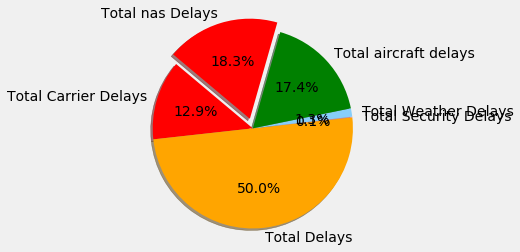

In [52]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

### Flights over the years:

In [44]:
# Function to group by, select required columns and compute total number of flights

def aggr_group_df(df, group, aggr_field, fields):
    new_df = pd.DataFrame(df.groupby(by=group)[fields].sum())
    new_df[aggr_field] = new_df.apply(lambda row: sum(row[fields]), axis = 1)
    return new_df


In [45]:
FLIGHTS_AGGR_FIELDS = ['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']
TOTAL_FLIGHTS_FIELD = 'total_flights'

In [46]:
# call function to group by year:

data_grouped_yr = aggr_group_df(data_lax, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
data_grouped_yr

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,199685,34067,2292,240,236284
2011,210952,39972,2764,341,254029
2012,222921,39347,2493,241,265002
2013,224821,42920,2541,332,270614
2014,221941,47721,2726,298,272686
2015,212435,45714,2337,315,260801
2016,212972,49065,1945,321,264303
2017,214312,52056,2218,308,268894
2018,221516,40015,2002,253,263786


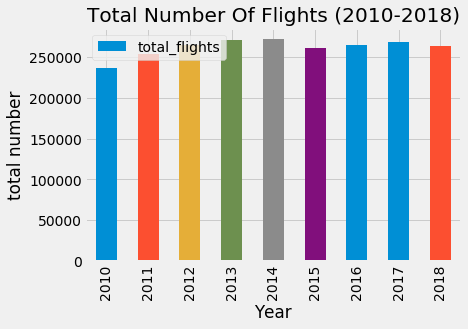

In [53]:
# Plot the graph

x_axis = data_grouped_yr.index.values
data_grouped_yr.plot.bar(x_axis, 'total_flights')

plt.title('Total Number Of Flights (2010-2018)')
plt.xlabel('Year')
plt.ylabel('total number')

plt.savefig("Images/Total Number Of Flights(2010-2018).png")
plt.show()

### Total flights over months

In [16]:
# function to convert 'month' to month-names

def to_month_name (month_idx):
    month_name = calendar.month_abbr[month_idx]
    return month_name


In [17]:
data_lax['month_name'] = data_lax['month'].apply(to_month_name)
data_lax

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,month_name
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,150.06,2.83,125.88,49,7,Jan
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,16.27,0.00,3.13,0,0,Jan
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,3.02,0.00,7.32,0,0,Jan
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,45.53,9.38,19.83,1,0,Jan
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,63.79,0.00,39.48,4,4,Jan
5,2010,1,F9,Frontier Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",172,29,8.68,0.80,12.00,0.00,7.52,0,0,Jan
6,2010,1,FL,AirTran Airways Corporation,LAX,"Los Angeles, CA: Los Angeles International",164,44,9.70,1.74,15.26,0.00,17.30,0,0,Jan
7,2010,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",60,17,9.95,0.00,1.00,0.00,6.05,0,0,Jan
8,2010,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1281,184,14.43,4.06,57.22,0.81,107.48,35,3,Jan
9,2010,1,OO,SkyWest Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3570,648,85.04,12.21,201.13,2.53,347.08,79,2,Jan


In [18]:
# call function to group by month:
data_grouped_mnth = aggr_group_df(data_lax, ['month_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)

data_grouped_mnth.index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_grouped_mnth

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
Jan,158910,31733,1454,194,192291
Feb,175388,36616,1855,175,214034
Mar,160288,39223,1965,397,201873
Apr,142086,28724,2365,296,173471
May,155164,29301,2571,217,187253
Jun,177278,38486,2036,189,217989
Jul,169900,38993,1801,163,210857
Aug,162707,34579,1951,217,199454
Sep,165137,34213,1435,168,200953
Oct,153551,25399,1249,313,180512


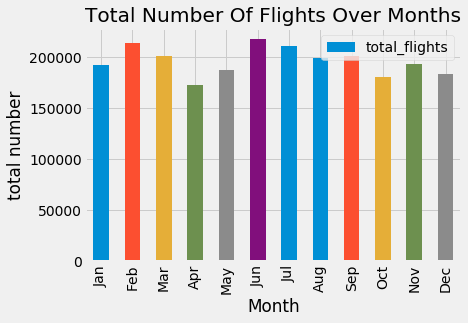

In [54]:
# plot

x_axis = data_grouped_mnth.index.values
data_grouped_mnth.plot.bar(x_axis, 'total_flights')

plt.title('Total Number Of Flights Over Months')
plt.xlabel('Month')
plt.ylabel('total number')

plt.savefig("Images/Total Number Of Flights Over Months.png")
plt.show()

### Total number of flights over the years

In [20]:
# call function to group by year and carrier_name

carrier_over_years = aggr_group_df(data_lax, [ 'year', 'carrier_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
carrier_over_years.head(20)

arr_flights  arr_del15  arr_cancelled  \
year carrier_name                                                          
2010 AirTran Airways Corporation          2347        568              4   
     Alaska Airlines Inc.                 5866        497             11   
     American Airlines Inc.              28067       5324            346   
     American Eagle Airlines Inc.        14495       1584            124   
     Continental Air Lines Inc.           7778       1816             33   
     Delta Air Lines Inc.                19552       4339            141   
     Frontier Airlines Inc.               2336        512              9   
     Hawaiian Airlines Inc.                803        172              0   
     JetBlue Airways                      1668        399             27   
     Mesa Airlines Inc.                   1530        221             15   
     SkyWest Airlines Inc.               44739       6772            583   
     Southwest Airlines Co.              39135       7904            664   
     US Airways Inc.                      5797       1051             36   
     United Air Lines Inc.               25572       2908            299   
2011 AirTran Airways Corporation          2427        533             10   
     Alaska Airlines Inc.                 6154        583              7   
     American Airlines Inc.              28781       6146            492   
     American Eagle Airlines Inc.        19910       2218            293   
     Continental Air Lines Inc.           8322       2196             59   
     Delta Air Lines Inc.                19674       3895            109   

                                   arr_diverted  total_flights  
year carrier_name                                               
2010 AirTran Airways Corporation              3           2922  
     Alaska Airlines Inc.                     3           6377  
     American Airlines Inc.                  59          33796  
     American Eagle Airlines Inc.             9          16212  
     Continental Air Lines Inc.              18           9645  
     Delta Air Lines Inc.                    39          24071  
     Frontier Airlines Inc.                   2           2859  
     Hawaiian Airlines Inc.                   6            981  
     JetBlue Airways                         15           2109  
     Mesa Airlines Inc.                       1           1767  
     SkyWest Airlines Inc.                   23          52117  
     Southwest Airlines Co.                  31          47734  
     US Airways Inc.                          6           6890  
     United Air Lines Inc.                   25          28804  
2011 AirTran Airways Corporation              5           2975  
     Alaska Airlines Inc.                     5           6749  
     American Airlines Inc.                  69          35488  
     American Eagle Airlines Inc.            41          22462  
     Continental Air Lines Inc.               9          10586  
     Delta Air Lines Inc.                    41          23719

In [65]:
#compute total number of flights per airline over the years

airlines_df = carrier_over_years.pivot_table(index='carrier_name', columns='year')['total_flights']
airlines_df = airlines_df.dropna(how='any')
airlines_df

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,6377.0,6749.0,6772.0,7226.0,7839.0,10298.0,10137.0,10715.0,21975.0
American Airlines Inc.,33796.0,35488.0,36546.0,37042.0,39273.0,43450.0,51223.0,46783.0,47698.0
Delta Air Lines Inc.,24071.0,23719.0,22347.0,24723.0,25716.0,32739.0,42549.0,39182.0,40547.0
Frontier Airlines Inc.,2859.0,2792.0,2234.0,1961.0,1704.0,1965.0,2210.0,2524.0,1491.0
Hawaiian Airlines Inc.,981.0,972.0,1303.0,1404.0,1714.0,1861.0,2067.0,2176.0,2780.0
JetBlue Airways,2109.0,3095.0,3508.0,4400.0,4322.0,5458.0,6323.0,7697.0,7738.0
SkyWest Airlines Inc.,52117.0,59623.0,62244.0,73867.0,70634.0,48632.0,30634.0,39964.0,38483.0
Southwest Airlines Co.,47734.0,47801.0,44885.0,47061.0,50958.0,52009.0,55057.0,56368.0,53285.0
United Air Lines Inc.,28804.0,28538.0,39657.0,39435.0,40740.0,37503.0,35479.0,32780.0,33725.0


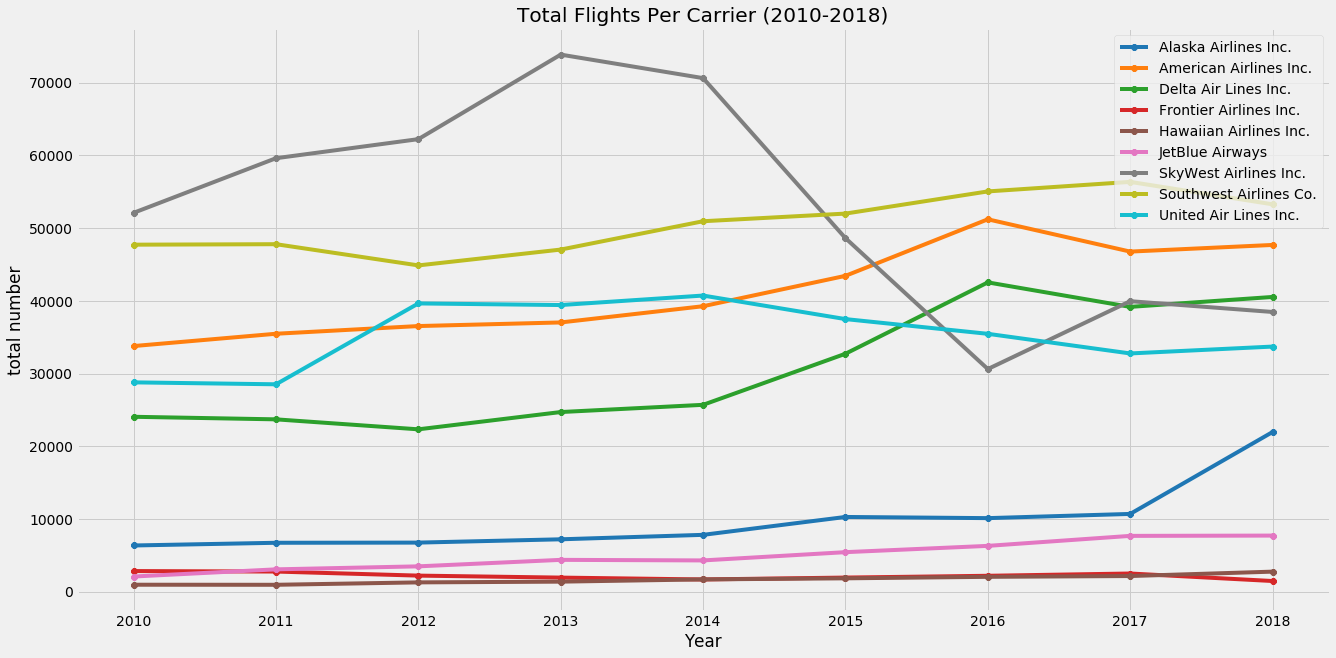

In [66]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in airlines_df]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for index in airlines_df.index.values:
    airlines_df.loc[index,:].plot(kind='line', marker="8", linestyle='-')

plt.title('Total Flights Per Carrier (2010-2018)')
plt.xlabel('Year')
plt.ylabel('total number')

plt.legend(loc='best')
plt.savefig("Images/Total Number Of Flights Per Carrier.png")
plt.show()

## Flights on time

In [23]:
# airlines  - perecentage of flights on times 

ontime_arr_pct = pd.DataFrame((carrier_over_years['arr_flights'] / carrier_over_years['total_flights']) * 100)

ontime_arr_pct = ontime_arr_pct.pivot_table(index='carrier_name', columns='year')

ontime_arr_pct = ontime_arr_pct.dropna(how='any')[0]
ontime_arr_pct

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,91.986828,91.183879,88.703485,88.956546,88.327593,87.279083,86.712045,81.269249,83.777019
American Airlines Inc.,83.048290,81.100654,81.631369,82.922088,81.941792,82.939010,80.684458,82.292713,85.160803
Delta Air Lines Inc.,81.226372,82.946161,86.727525,87.125349,86.051485,84.972052,83.806905,82.014701,86.302316
Frontier Airlines Inc.,81.706891,78.975645,76.499552,74.553799,80.164319,78.371501,78.325792,76.624406,78.001341
Hawaiian Airlines Inc.,81.855250,83.539095,81.580967,86.894587,88.506418,90.327781,85.631350,80.468750,78.201439
JetBlue Airways,79.089616,76.510501,82.953250,76.886364,78.991208,82.246244,81.274711,76.861115,81.274231
SkyWest Airlines Inc.,85.843391,83.996109,83.958293,84.528951,83.022341,80.681444,81.579291,79.589130,84.834862
Southwest Airlines Co.,81.985587,81.351855,83.987969,79.498948,75.897798,78.847892,76.497085,75.321104,80.424134
United Air Lines Inc.,88.779336,84.007289,79.890057,82.249271,79.963181,79.977602,80.374306,82.995729,85.313566


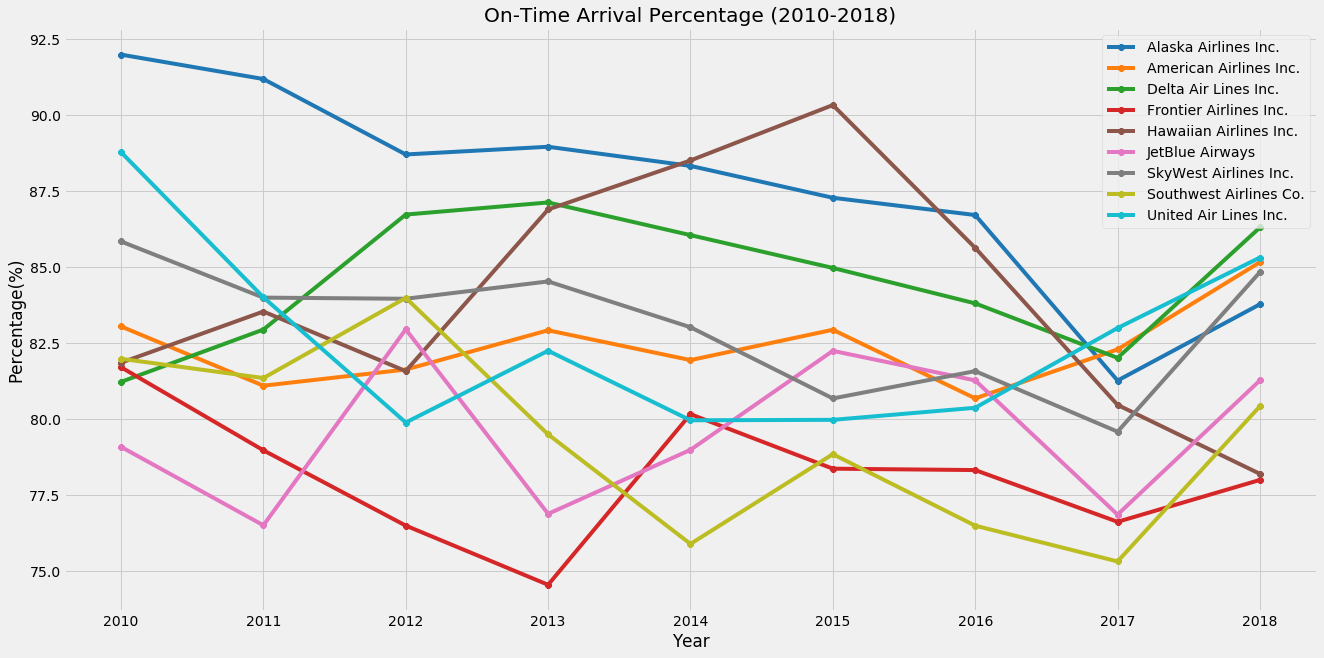

In [56]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in ontime_arr_pct]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for airline in ontime_arr_pct.index.values:
    ontime_arr_pct.loc[airline,:].plot(kind='line', marker="8", linestyle='-')
    
plt.title('On-Time Arrival Percentage (2010-2018)')
plt.xlabel('Year')
plt.ylabel('Percentage(%)')

plt.legend(loc='best')
plt.savefig("On-time Arrival Percentage (2010-2018.png")
plt.show()


## Delay Analysis

In [25]:
delay_data = data_lax[['year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']]

delay_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2382,443,145.89,18.34,150.06,2.83,125.88,49,7
1,2010,1,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",440,33,11.88,1.72,16.27,0.00,3.13,0,0
2,2010,1,B6,JetBlue Airways,LAX,"Los Angeles, CA: Los Angeles International",93,12,1.56,0.10,3.02,0.00,7.32,0,0
3,2010,1,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",553,131,50.43,5.83,45.53,9.38,19.83,1,0
4,2010,1,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1524,186,76.44,6.28,63.79,0.00,39.48,4,4


In [26]:
# groupdata by year:
delay_data = delay_data.groupby('year')[['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_data

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
year,,,,,,
2010,34067,9562.82,802.83,9963.66,140.80,13596.93
2011,39972,10125.24,868.77,13880.91,100.45,14996.57
2012,39347,10854.90,987.03,11838.27,93.71,15573.16
2013,42920,11545.14,1183.00,12848.19,99.38,17244.38
2014,47721,12684.15,1466.55,15140.83,91.76,18337.57
2015,45714,11948.06,1439.25,17421.36,87.49,14817.71
2016,49065,11896.12,1264.49,21701.23,95.88,14107.23
2017,52056,10764.04,1400.26,25325.81,92.55,14473.28
2018,40015,11186.88,1106.56,14998.31,73.40,12649.93


In [27]:
# function to find delay-percentage

def find_percentage(flight_delays, total_flight_delays):
        pct = (flight_delays / total_flight_delays) * 100
        return pct
   
        

In [28]:
# call function to find the various delay percentages

delay_data['carrier_ct%'] = delay_data.apply(lambda row: find_percentage(row['carrier_ct'], row['arr_del15']),axis=1)

delay_data['weather_ct%'] = delay_data.apply(lambda row: find_percentage(row['weather_ct'], row['arr_del15']),axis=1)

delay_data['nas_ct%'] = delay_data.apply(lambda row: find_percentage(row['nas_ct'], row['arr_del15']),axis=1)

delay_data['security_ct%'] = delay_data.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)

delay_data['late_aircraft_ct%'] = delay_data.apply(lambda row: find_percentage(row['late_aircraft_ct'], row['arr_del15']),axis=1)

        
delay_data


,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
year,,,,,,,,,,,
2010,34067,9562.82,802.83,9963.66,140.80,13596.93,28.070626,2.356621,29.247248,0.413303,39.912320
2011,39972,10125.24,868.77,13880.91,100.45,14996.57,25.330832,2.173446,34.726584,0.251301,37.517687
2012,39347,10854.90,987.03,11838.27,93.71,15573.16,27.587618,2.508527,30.086843,0.238163,39.579028
2013,42920,11545.14,1183.00,12848.19,99.38,17244.38,26.899208,2.756291,29.935205,0.231547,40.177959
2014,47721,12684.15,1466.55,15140.83,91.76,18337.57,26.579808,3.073175,31.727814,0.192284,38.426626
2015,45714,11948.06,1439.25,17421.36,87.49,14817.71,26.136545,3.148379,38.109463,0.191386,32.413943
2016,49065,11896.12,1264.49,21701.23,95.88,14107.23,24.245633,2.577173,44.229553,0.195414,28.752125
2017,52056,10764.04,1400.26,25325.81,92.55,14473.28,20.677809,2.689911,48.651087,0.177789,27.803289
2018,40015,11186.88,1106.56,14998.31,73.40,12649.93,27.956716,2.765363,37.481719,0.183431,31.612970


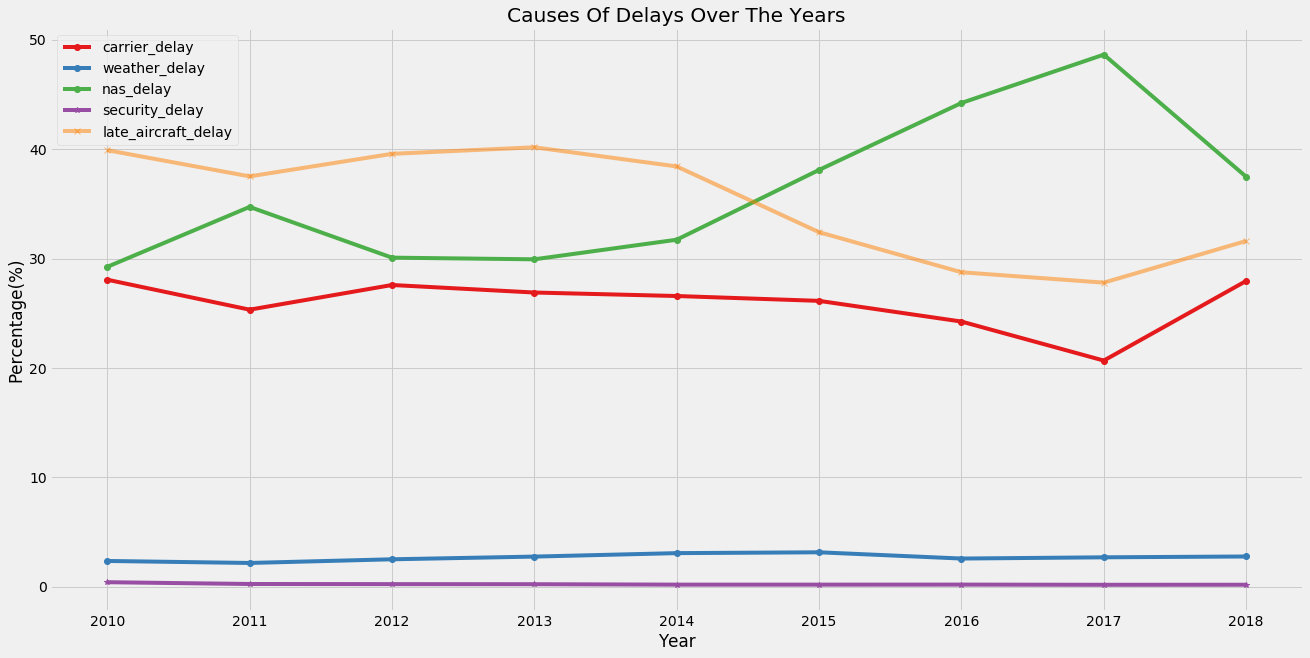

In [57]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in delay_data.index.values]

num_of_plots = len(delay_data.index)
colormap = plt.cm.Set1
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

ax1 = delay_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = delay_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = delay_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = delay_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = delay_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)

plt.title('Causes Of Delays Over The Years')
plt.xlabel('Year')
plt.ylabel('Percentage(%)')
plt.legend()

plt.savefig("Images/Causes Of Delays Over The Years.png")
plt.show()

In [58]:
# ontime arrival vs delays

data_grouped_yr


,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,199685,34067,2292,240,236284
2011,210952,39972,2764,341,254029
2012,222921,39347,2493,241,265002
2013,224821,42920,2541,332,270614
2014,221941,47721,2726,298,272686
2015,212435,45714,2337,315,260801
2016,212972,49065,1945,321,264303
2017,214312,52056,2218,308,268894
2018,221516,40015,2002,253,263786


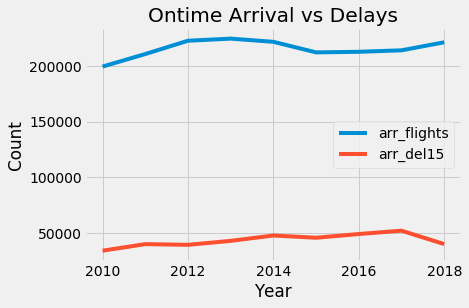

In [60]:
#plot

data_grouped_yr['arr_flights'].plot()
data_grouped_yr['arr_del15'].plot()

plt.title('Ontime Arrival vs Delays')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.savefig("Images/Ontime Arrival vs Delays.png")
plt.show()